# QUESTIONS FOR FEEDBACK!!!!!! 
* Did we calculate treatment effects correctly? We extracted post treatment the synthetic control salaries and took the difference between actual Wisconsin salaries and sythetic control salaries.
* What's the exact causal inference we should be using?
*  We followed the textbook by narrowing down the donor pool using a MSE threshold (RMSE in our case) and running a second synthetic control. Changing the minimum RMSE requirement alters the graph and its corresponding confidence intervals taller. Any advice?

# Investigating the Effect of 2011 Act 10 on Public Teacher Salaries in Wisconsin
**Authors:** Rico Chan and Amit Paul

## Abstract
* Investigate effect of Wisconsin Act 10 on public teacher salaries
* Baseline diff in diff between two states, Wisconsin and Minnesota
* Baseline diff in diff including more untreated states
* Since not enough states to cluster on and make inference, run synthetic control and compare results


## Introduction
Union membership rates have also declined in the past several decades, both in the United States and Canada *(ECON 460 slide)*. *Briefly write some more big picture union history in North America stuff.*

In his seminal paper on unions, Hirschman (1970) suggests that workers dissatisfied with their current working conditions can choose one of two actions. First, they may “exit”, meaning that they simply resign and seek another job. Second, they may use their “voice”, staying at their job to demand better conditions. He postulates that unions enable workers to use their voice by providing collective bargaining, and grievance and arbitration systems. Freeman (1980) investigates this notion further, finding that union membership is positively associated with years spent at the same company and negatively associated with quitting behaviour or being fired. 

*Briefly talk about the history of laws essentially prohibiting unions in the United States, right to work laws etc. Apparently, Act 10 technically isn’t a RTW law but even broader/more stringent?*

U.S. labour unions gained strong legal protections with the National Labor Relations Act of 1935, but later laws and policy developments steadily reduced their power. The Labor Management Relations Act of 1947 (Taft-Hartley Act) weakened key union tactics by restricting secondary boycotts and jurisdictional strikes, and authorizing states to enact Right-to-Work (RTW) laws that prohibit union security agreements and undermine the unions’ ability to collect membership fees for all covered workers [1], [2]. According to the U.S. Department of Labor, the Taft-Hartley Act marked a shift toward a legal outcome less favorable to unions, and subsequent measures, such as the Labor-Management Reporting and Disclosure Act of 1959, further increased federal oversight of internal union affairs and limited certain forms of picketing. [3].

*Short transitional paragraph/sentence connecting public unions to teachers. Three common strategies to weaken teacher unions are by introducing policies that preclude collective bargaining, agency fees (i.e., the collection of union membership fees), and strikes.*

An especially notable example of such policies was Act 10, a Wisconsin state law first introduced in 2011 under former Republican governor Scott Walker. Act 10 dictated how state government employees, including teachers and nurses, could use their “voice” to bargain over work pay and conditions (PBS Wisconsin). Among the changes included restrictions to what unions could negotiate beyond wages and the impediment of member fee collections, all of which worked to undermine the survival of public sector unions (WPR). The enactment proved to be controversial, triggering weeks of large protests, a walkout of Democratic senators, numerous legal challenges, and even recall elections seeking to unseat then Governor Walker. However, supporters argued that before the act, the previous labour market for public employees was inefficient and diverted proper spending in school districts and local governments (PBS Wisconsin). As of writing this report, attempts to repeal the law are still playing out in the courts more than a decade after it took effect. 


We are particularly interested in the effect of policies that weaken public-sector collective bargaining rights on teacher compensation.
Thus, our research question is, “How do laws obstructing public employee unions affect teacher wages?” More specifically, we assess how the 2011 Wisconsin Act 10 impacted salaries for elementary and secondary public school teachers. We hypothesize that by impeding the collective bargaining power of public employees, Act 10 reduced teacher salaries.

Janus v. American Federation of State, County, and Municipal Employees, Council 31 (2018) is a landmark U.S. Supreme Court decision that states and public sector unions may no longer collect “agency” or “fair-share” fees from non-consenting employees, on the ground that such compelled payments violate the First Amendment, thereby overruling Abood v. Detroit Board of Education (1997) [4]. Since public sector unions remain legally obligated to represent all workers in a bargaining unit, including non-members, the ruling removes a major, previously stable revenue source while preserving the duty of fair representation, creating strong free rider incentives. Policy analyses, therefore, describe Janus as a significant constraint on public sector union power, limiting unions’ financial resources, their capacity to bargain and litigate effectively, and their prospects for future membership growth [5], [6].

### Literature Review
The effect of unions remains a contentious topic. On one hand, the collective power of unions helps to give workers a seat at the table. On the other hand, unions are said to inefficiently sustain high wages and prevent poor-performing workers from being fired. Furthermore, both its proponents and detractors claim that unions have an impact on productivity. 

Literature on act 10. Both studies in favour and against Act 10. Union membership fell precipitously. 

However, there has been a lack of 
This report contributes to the literature in the following ways. First. methodological Second. Lastly. 

*No papers that investigate Act 10 effect on teacher salaries using synthetic control?*


## Data
We obtained data from two sources. First is the Correlates of State Policy Project (CSPP) from the University of Michigan. It is a comprehensive state-level panel dataset containing a diverse range of policy indicator variables and outcomes such as education, healthcare, environment, and criminal justice. This dataset is assembled by compiling data from a plethora of different existing studies. The specific data that we use from the CSPP describes the timing of policies prohibiting agency fees for different states. Since we eventually narrowed our research scope to focus only on Wisconsin being treated, this dataset was not needed. Nevertheless, we mention it in this report because of its value and potential for future research. Second is a table on average teacher salaries by state from 1990 to 2020, obtained from the National Science Board (NSB). Their data was assembled using estimates from the National Education Association (NEA). We merged the two datasets by state and year. 

Our analysis particularly used data from the CSPP dataset in the time period of 1990 to 2017 for the following states: Alaska, California, Colorado, Connecticut, Delaware, Hawaii, Illinois, Kentucky, Maine, Maryland, Massachusetts, Minnesota, Missouri, Montana, New Hampshire, New Jersey, New Mexico, New York, Ohio, Oregon, Pennsylvania, Rhode Island, Vermont, and Washington. For a robustness check later in the paper, we use data for Michigan in the same time period.


In [2]:
# Include summary stats

## Methodology

We employ a differences-in-differences framework to find the causal effect of the RTW policy on teachers’ wages.

$$
\left( E[Y(1)\mid D = 1] - E[Y(1)\mid D = 0] \right)
-
\left( E[Y(0)\mid D = 1] - E[Y(0)\mid D = 0] \right)
$$

An initial approach was to use two states: Wisconsin in the treatment group and Minnesota in the control group. However, the number of observations for each state in the time period 1990-2017 is 28. With such a small sample size, the standard errors may not be well defined. Therefore, we use a synthetic control for our analysis. The treated unit is Wisconsin, and the donor pool consists of all the other states from the list in the “Data” section. The donor pool states never implemented the RTW or any similar policy within or prior to the time period being analyzed. We will combine the untreated states to build a fake state that closely resembles the pre-treatment trend of Wisconsin. We’ll see how the synthetic control behaves after the intervention.

We have $J+1$ units. Without loss of generality, assume that unit $1$ is the unit that gets affected by an intervention. Units $j = 2, \ldots, J+1$ are a collection of untreated units that we will refer to as the donor pool. Also assume that the data we have span $T$ time periods, with $T_0$ periods before the intervention. For each unit $j$ and each time $t$, we observe the outcome $Y_{jt}$. For each unit $j$ and each time $t$, define $ Y^{N}_{jt} $ as the potential outcome without intervention and $Y^{I}_{jt}$ the potential outcome with intervention.

To estimate $Y^{N}_{1t}$, we remember that a combination of units in the donor pool may approximate the characteristics of the treated unit much better than any untreated unit alone. Thus, a synthetic control is defined as a weighted average of the units in the control pool. Given the weights $\mathbf{W} = (w_2, \ldots, w_{J+1})$, the synthetic control estimate of
$Y^{N}_{jt}$ is


$$
\hat Y^{N}_{jt}
  = \sum_{j=2}^{J+1} w_j Y_{jt}
$$

$$
\mathbf{W} = (w_2, \ldots, w_{J+1}) \quad \text{minimizes} \quad
\lVert \mathbf{X}_1 - \mathbf{X}_0 \mathbf{W} \rVert
  = \left(
      \sum_{h=1}^k v_h
      \left(
        X_{h1} - \sum_{j=2}^{J+1} w_j X_{hj}
      \right)^2
    \right)^{1/2}
$$


Then, the effect for the treated unit $j = 1$ at time $t$, for $t > T_0$, is defined as


$$
\tau_{it} := Y_{it}(1) - Y_{it}(0), \qquad t > T_0, \; i = 1, \ldots, N_1,
$$

$$
\tau_t := \frac{1}{N_1} \sum_{j=1}^{N_1} \bigl( Y_{jt}(1) - Y_{jt}(0) \bigr),
\qquad t > T_0.
$$

## Results

In [3]:
import pandas as pd
import numpy as np
import pyfixest as pf
import scipy
from scipy import stats
import altair as alt
import statsmodels.formula.api as smf

In [4]:
# Read state policy data
df = pd.read_csv('data/cspp_data_2025-11-20.csv')
df.columns
df

# Read NEA teacher salary data
salaries_df_wide = pd.read_csv('data/teacher_salaries.csv')
salaries_df = pd.melt(salaries_df_wide, id_vars = ['State'], var_name = 'Year', value_name = 'Salary')
salaries_df.rename(columns = {'State': 'state', 'Year': 'year', 'Salary': 'salary'}, inplace = True)

salaries_df['year'] = salaries_df['year'].astype(int)
salaries_df['salary'] = salaries_df['salary'].replace({',': ''}, regex=True).astype(int)

In [5]:
# Select relevant variables from CSPP 
df_filtered = df[['year', 'st', 'state', 'agencyfeesprohibited']]

# Filter between 1990 and 2017 
df_filtered = df_filtered[(df_filtered['year'] >= 1990) & (df_filtered['year'] <= 2017)]

df_merged = pd.merge(df_filtered, salaries_df, on = ['state', 'year'], how = 'left')

# Drop District of Columbia
df_merged = df_merged[df_merged['state'] != 'District of Columbia']

# Adjust variable types
df_merged['agencyfeesprohibited'] = df_merged['agencyfeesprohibited'].astype(int)
df_merged["state"] = df_merged["state"].astype("string")
df_merged["st"] = df_merged["st"].astype("string")

# Identify states that ever had a 1 under 'agencyfeesprohibited' i.e., ever had a RTW law pass
states_with_fees_prohibited = df_merged[df_merged['agencyfeesprohibited'] == 1]['st'].unique()

# Exclude states that ever had RTW except for Wisconsin (our sole treatment)
df = df_merged[~((df_merged['st'].isin(states_with_fees_prohibited)) & (df_merged['st'] != 'WI'))]

df

,year,st,state,agencyfeesprohibited,salary
0,1990,AK,Alaska,0,43153
1,1991,AK,Alaska,0,43427
2,1992,AK,Alaska,0,44661
3,1993,AK,Alaska,0,46701
4,1994,AK,Alaska,0,47512
...,...,...,...,...,...
1367,2013,WI,Wisconsin,1,53797
1368,2014,WI,Wisconsin,1,53679
1369,2015,WI,Wisconsin,1,52264
1370,2016,WI,Wisconsin,1,54115


### Baseline DID

<Axes: title={'center': 'Treatment Assignment Cohorts'}, xlabel='Year', ylabel='Cohort'>

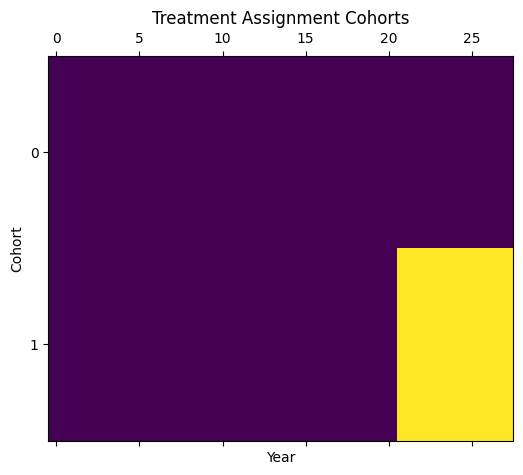

In [6]:
df_did1 = df[df['state'].isin(['Wisconsin', 'Minnesota'])]

pf.panelview(
    df,
    unit="state",
    time="year",
    treat="agencyfeesprohibited",
    collapse_to_cohort=True,
    sort_by_timing=True,
    ylab="Cohort",
    xlab="Year",
    title="Treatment Assignment Cohorts",
    figsize=(6, 5),
)

Beyond the similarities between WIsconsin and Minnesota, we can plot parallel trends. Seems to hold pretreatment. So convincing that post treamtent counterfactual would also trend the same. 

In [7]:
plot = alt.Chart(
    df_did1, 
    title = alt.Title(
        'Title', 
        subtitle = 'Subtitle'
        )).mark_line().encode(
    alt.X('year:Q'), 
    alt.Y('salary:Q').scale(zero=False), 
    alt.Color('state:N'))

vline = alt.Chart(pd.DataFrame({"year":[2011]})).mark_rule(color="red").encode(x='year:Q')

plot + vline

alt.LayerChart(...)

In [8]:
fit_static_twfe1 = pf.feols(
    "salary ~ agencyfeesprohibited | state + year",
    df_did1
) 
fit_static_twfe1.summary()


###

Estimation:  OLS
Dep. var.: salary, Fixed effects: state+year
Inference:  iid
Observations:  56

| Coefficient          |   Estimate |   Std. Error |   t value |   Pr(>|t|) |      2.5% |    97.5% |
|:---------------------|-----------:|-------------:|----------:|-----------:|----------:|---------:|
| agencyfeesprohibited |  -2208.000 |      715.136 |    -3.088 |      0.005 | -3677.983 | -738.017 |
---
RMSE: 789.489 R2: 0.989 R2 Within: 0.268 


### Baseline 2

Incorporate all untreated states. But parallel trends probably doesn't hold anymore. 

In [9]:
plot = alt.Chart(
    df_merged, 
    title = alt.Title(
        'Title', 
        subtitle = 'Subtitle'
        )).mark_line().encode(
    alt.X('year:Q'), 
    alt.Y('salary:Q').scale(zero=False), 
    alt.Color('state:N'))

vline_WI = alt.Chart(pd.DataFrame({"year":[2011]})).mark_rule(color="red").encode(x='year:Q')

plot + vline_WI 

alt.LayerChart(...)

In [10]:
fit_static_twfe2 = pf.feols(
    "salary ~ agencyfeesprohibited | state + year",
    df
) 
fit_static_twfe2.summary()

###

Estimation:  OLS
Dep. var.: salary, Fixed effects: state+year
Inference:  iid
Observations:  672

| Coefficient          |   Estimate |   Std. Error |   t value |   Pr(>|t|) |      2.5% |     97.5% |
|:---------------------|-----------:|-------------:|----------:|-----------:|----------:|----------:|
| agencyfeesprohibited |  -3827.867 |     1056.199 |    -3.624 |      0.000 | -5902.028 | -1753.707 |
---
RMSE: 2275.594 R2: 0.96 R2 Within: 0.021 


Both estimates unreliable inference since cannot cluster on states

### Synthetic Control

In [11]:
import random
from scpi_pkg.scdata import scdata
from scpi_pkg.scest import scest
from scpi_pkg.scplot import scplot
from sklearn.preprocessing import StandardScaler
from scpi_pkg.scpi import scpi

In [12]:
# Prepare data
df["wisconsin"] = (df["st"] == 'WI')
df["after_treatment"] = df["year"] > 2011

# Scale data since salary large values, otherwise scpi package can't calcluate 
scaler = StandardScaler()
df["salary_scaled"] = scaler.fit_transform(df[["salary"]])


-----------------------------------------------------------------------
Call: scest
Synthetic Control Estimation - Setup

Constraint Type:                                           simplex
Constraint Size (Q):                                             1
Treated Unit:                                            Wisconsin
Size of the donor pool:                                         23
Features                                                         1
Pre-treatment period                                     1990-2011
Pre-treatment periods used in estimation:                       22
Covariates used for adjustment:                                  0

Synthetic Control Estimation - Results

Active donors: 7

Coefficients:
                            Weights
Treated Unit Donor                 
Wisconsin    Alaska           0.181
             California       0.000
             Colorado         0.000
             Connecticut      0.000
             Delaware         0.000
             Hawa

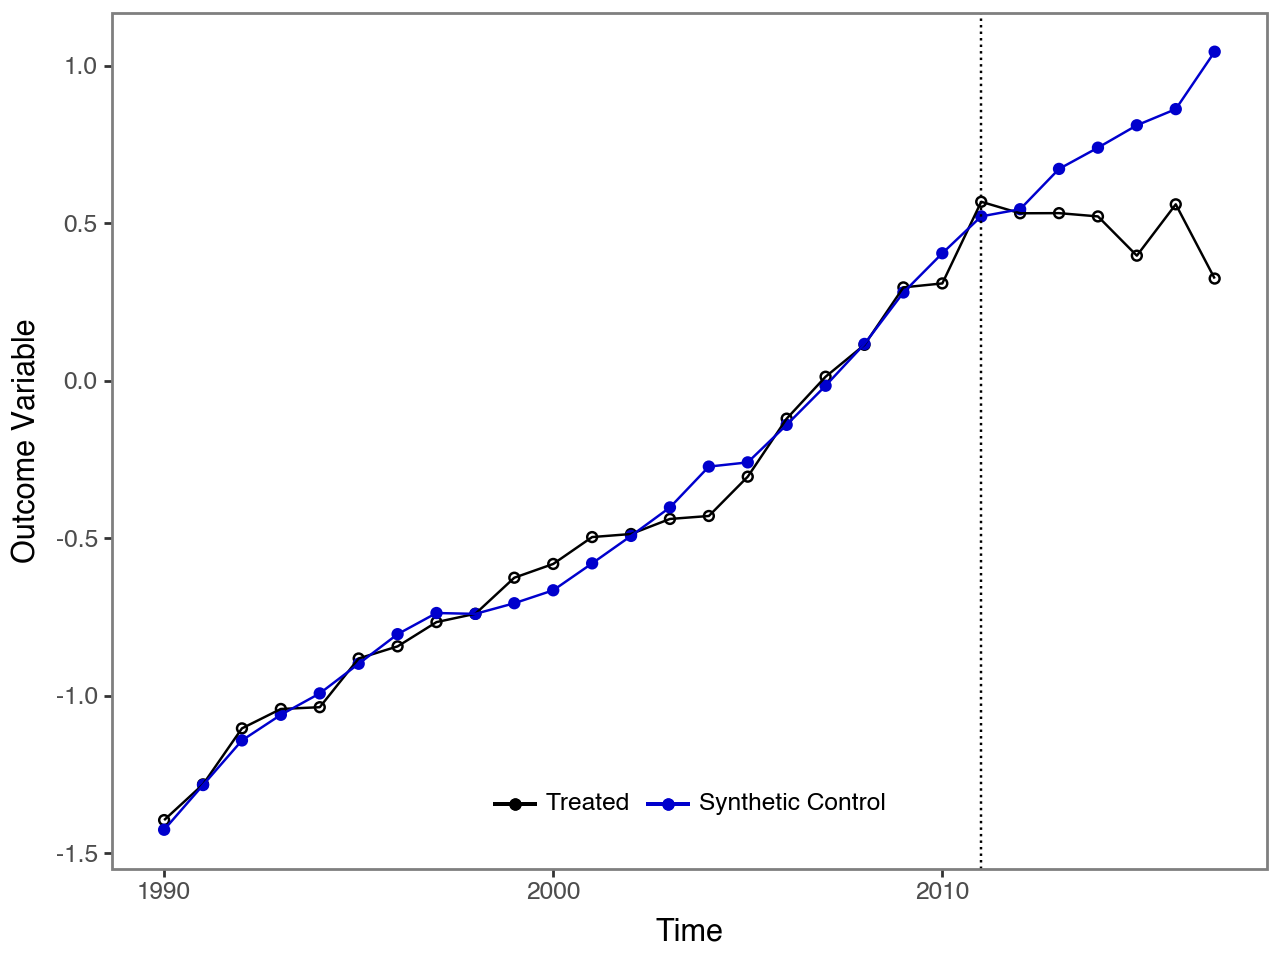

In [13]:
# Weights and estimates
scdf = scdata(df = df, id_var= "state", time_var="year", outcome_var="salary_scaled",
              period_pre=df.query("not after_treatment").year.unique(),
              period_post=df.query("after_treatment").year.unique(),
              unit_tr='Wisconsin',
              unit_co=df.query("not wisconsin").state.unique(),
              features=["salary_scaled"],
              cov_adj=None, 
              cointegrated_data=True,
              constant=False)

est_si = scest(scdf, w_constr={'name': "simplex"})
print(est_si)
est_si2 = scest(scdf, w_constr={'p': 'L1', 'dir': '==', 'Q': 1, 'lb': 0})
print(est_si2)
scplot(est_si)

Examine how the synthetic Wisconsin was constructed. Weights of which states in particular?

-----------------------------------------------
Estimating Weights...
Quantifying Uncertainty

terations completed (10%)
terations completed (20%)
terations completed (30%)
terations completed (40%)
iterations completed (50%)
iterations completed (60%)
iterations completed (70%)
iterations completed (80%)
iterations completed (90%)


/Users/rico/Documents/526-project/.venv/lib/python3.13/site-packages/plotnine/layer.py:374: PlotnineWarning: geom_errorbar : Removed 22 rows containing missing values.


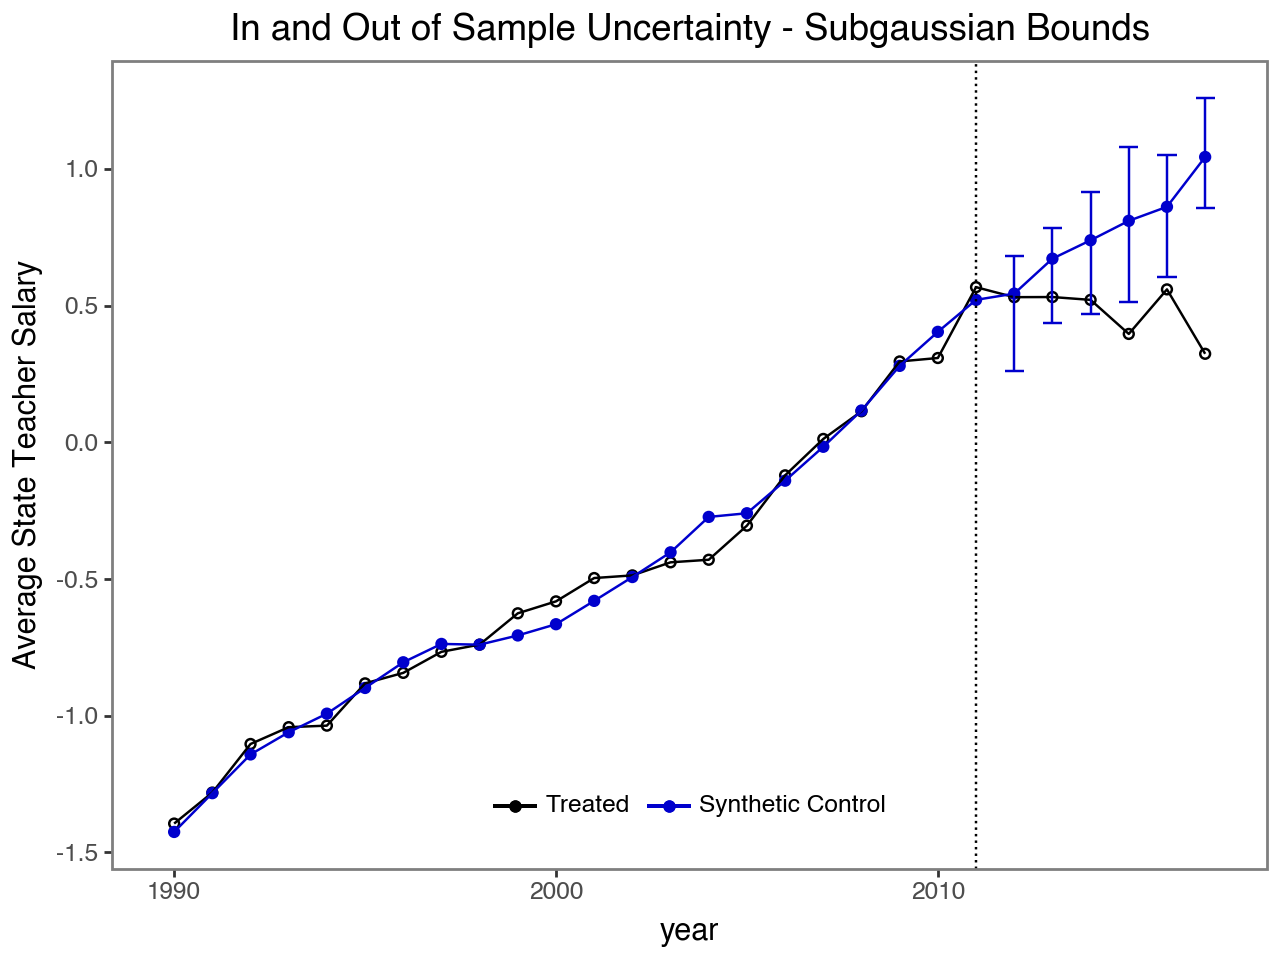

In [18]:
# Inference
w_constr = {'name': 'simplex', 'Q': 1}
u_missp = True
u_sigma = "HC1"
u_order = 1
u_lags = 0
e_method = "gaussian"
e_order = 1
e_lags = 0
e_alpha = 0.05
u_alpha = 0.05
sims = 200
cores = 1

random.seed(1)
result = scpi(scdf, sims=sims, w_constr=w_constr, u_order=u_order, u_lags=u_lags,
              e_order=e_order, e_lags=e_lags, e_method=e_method, u_missp=u_missp,
              u_sigma=u_sigma, cores=cores, e_alpha=e_alpha, u_alpha=u_alpha)
scplot(result, e_out=True, x_lab="year", y_lab="Average State Teacher Salary")

In [19]:
sc = np.concatenate([est_si.Y_pre_fit, est_si.Y_post_fit]).reshape(-1, 1).flatten()

sc_original = scaler.inverse_transform(
    np.concatenate([est_si.Y_pre_fit, est_si.Y_post_fit]).reshape(-1, 1)).flatten()

synth_results = pd.DataFrame({
    'year': list(est_si.period_pre) + list(est_si.period_post),
    'synthetic_control': sc_original, 
    'synthetic_control_scaled': sc})

df = pd.merge(df, synth_results, on = ['year'], how = 'left')

In [20]:
# Calculate treatment effects
df['te'] = df['salary'] - df['synthetic_control']

df_te_wi = df[df['st'] == 'WI']
df_te_wi = df_te_wi[df_te_wi['after_treatment'] == True]
df_te_wi = df_te_wi[['year', 'state', 'salary', 'synthetic_control', 'te']]
df_te_wi

,year,state,salary,synthetic_control,te
666,2012,Wisconsin,53792,53938.546452,-146.546452
667,2013,Wisconsin,53797,55391.564265,-1594.564265
668,2014,Wisconsin,53679,56156.723469,-2477.723469
669,2015,Wisconsin,52264,56964.046714,-4700.046714
670,2016,Wisconsin,54115,57546.301681,-3431.301681
671,2017,Wisconsin,51439,59615.684558,-8176.684558


In [21]:
from sklearn.metrics import mean_squared_error

df_before_treatment = df[df['after_treatment'] == False]

state_mse = df_before_treatment.groupby('state').apply(lambda group: mean_squared_error(group['salary'], group['synthetic_control'])).reset_index(name='MSE')
state_mse
state_mse['RMSE'] = np.sqrt(state_mse['MSE'])

states_filtered = state_mse[state_mse['RMSE'] < 5000]['state'].tolist() # Picked 5000 somewhat arbitrarily
states_filtered

['Colorado',
 'Delaware',
 'Hawaii',
 'Minnesota',
 'New Hampshire',
 'Ohio',
 'Oregon',
 'Vermont',
 'Washington',
 'Wisconsin']

-----------------------------------------------------------------------
Call: scest
Synthetic Control Estimation - Setup

Constraint Type:                                           simplex
Constraint Size (Q):                                             1
Treated Unit:                                            Wisconsin
Size of the donor pool:                                          9
Features                                                         1
Pre-treatment period                                     1990-2011
Pre-treatment periods used in estimation:                       22
Covariates used for adjustment:                                  0

Synthetic Control Estimation - Results

Active donors: 4

Coefficients:
                            Weights
Treated Unit Donor                 
Wisconsin    Colorado         0.000
             Delaware         0.184
             Hawaii           0.000
             Minnesota        0.000
             New Hampshire    0.000
             Ohio

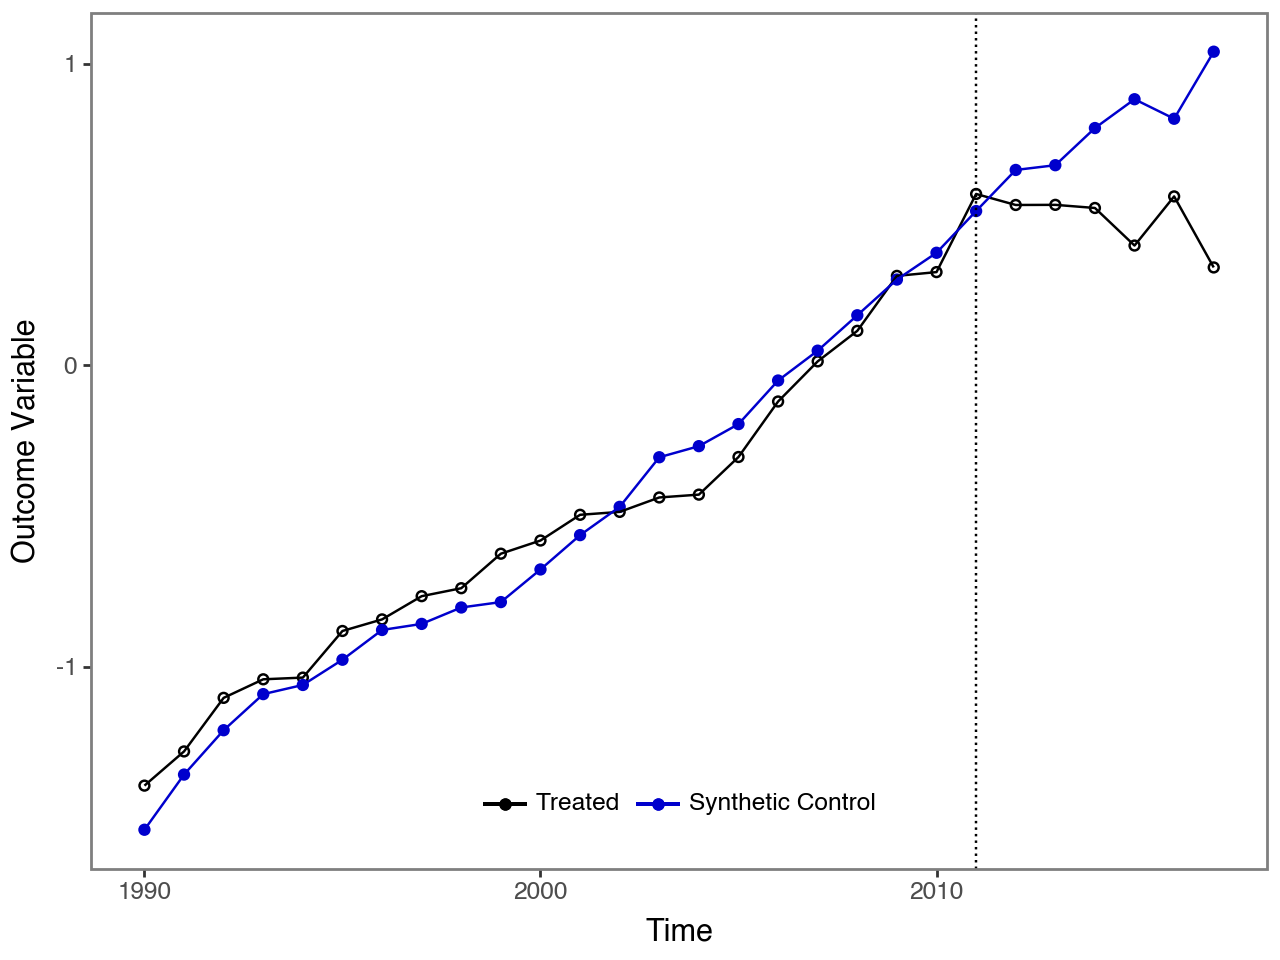

In [22]:
df2 = df[df['state'].isin(states_filtered)]

scdf2 = scdata(df = df2, id_var="state", time_var="year", outcome_var="salary_scaled",
              period_pre=df2.query("not after_treatment").year.unique(),
              period_post=df2.query("after_treatment").year.unique(),
              unit_tr='Wisconsin',
              unit_co=df2.query("not wisconsin").state.unique(),
              features=["salary_scaled"],
              cov_adj=None, 
              cointegrated_data=True,
              constant=False)

est_si2 = scest(scdf2, w_constr={'name': "simplex"})
print(est_si2)
scplot(est_si2)

-----------------------------------------------
Estimating Weights...
Quantifying Uncertainty

terations completed (10%)
terations completed (20%)
terations completed (30%)
terations completed (40%)
iterations completed (50%)
iterations completed (60%)
iterations completed (70%)
iterations completed (80%)
iterations completed (90%)


/Users/rico/Documents/526-project/.venv/lib/python3.13/site-packages/plotnine/layer.py:374: PlotnineWarning: geom_errorbar : Removed 22 rows containing missing values.


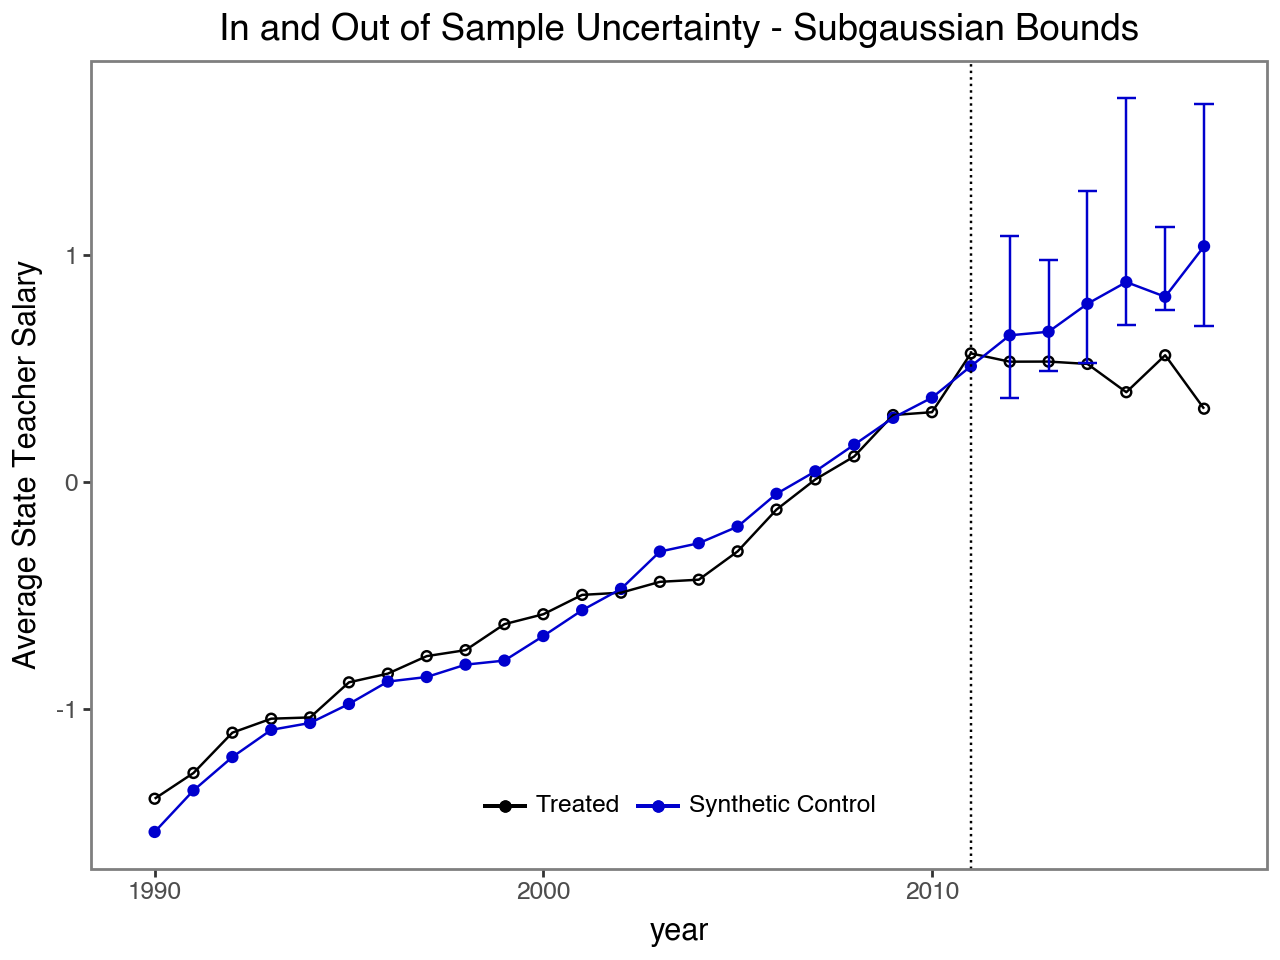

In [23]:
from scpi_pkg.scpi import scpi

random.seed(1)
result2 = scpi(scdf2, sims=sims, w_constr=w_constr, u_order=u_order, u_lags=u_lags,
              e_order=e_order, e_lags=e_lags, e_method=e_method, u_missp=u_missp,
              u_sigma=u_sigma, cores=cores, e_alpha=e_alpha, u_alpha=u_alpha)
scplot(result2, e_out=True, x_lab="year", y_lab="Average State Teacher Salary")

### Robustness


For a robustness check, we apply the treatment group to Michigan, which implemented the RTW policy in 2013. While we must note that the Act 10 policy was more severe than the RTW policy in terms of weakening unions, the direction of the result is expected to be the same.

In [32]:
df = df_merged[~((df_merged['st'].isin(states_with_fees_prohibited)) & (df_merged['st'] != 'MI'))]
df["michigan"] = (df["st"] == 'MI')
df["after_treatment"] = df["year"] > 2013

-----------------------------------------------------------------------
Call: scest
Synthetic Control Estimation - Setup

Constraint Type:                                           simplex
Constraint Size (Q):                                             1
Treated Unit:                                             Michigan
Size of the donor pool:                                         23
Features                                                         1
Pre-treatment period                                     1990-2013
Pre-treatment periods used in estimation:                       24
Covariates used for adjustment:                                  0

Synthetic Control Estimation - Results

Active donors: 5

Coefficients:
                            Weights
Treated Unit Donor                 
Michigan     Alaska           0.081
             California       0.000
             Colorado         0.000
             Connecticut      0.403
             Delaware         0.000
             Hawa

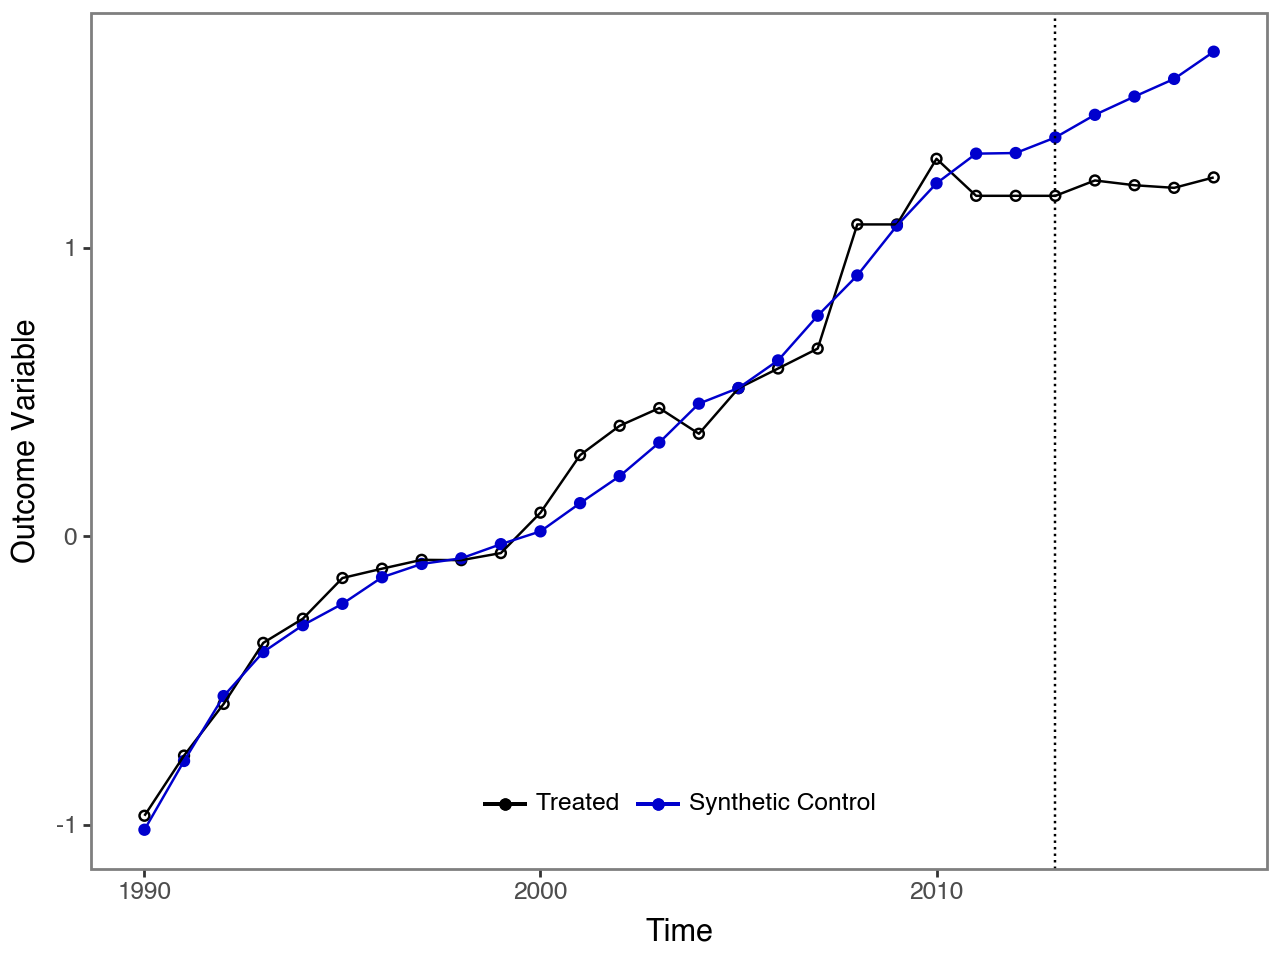

In [33]:
df["salary_scaled"] = scaler.fit_transform(df[["salary"]])

scdf = scdata(df = df, id_var= "state", time_var="year", outcome_var="salary_scaled",
              period_pre=df.query("not after_treatment").year.unique(),
              period_post=df.query("after_treatment").year.unique(),
              unit_tr='Michigan',
              unit_co=df.query("not michigan").state.unique(),
              features=["salary_scaled"],
              cov_adj=None, 
              cointegrated_data=True,
              constant=False)

est_si = scest(scdf, w_constr={'name': "simplex"})
print(est_si)
scplot(est_si)

-----------------------------------------------
Estimating Weights...
Quantifying Uncertainty

terations completed (10%)
terations completed (20%)
terations completed (30%)
terations completed (40%)
iterations completed (50%)
iterations completed (60%)
iterations completed (70%)
iterations completed (80%)
iterations completed (90%)


/Users/rico/Documents/526-project/.venv/lib/python3.13/site-packages/plotnine/layer.py:374: PlotnineWarning: geom_errorbar : Removed 24 rows containing missing values.


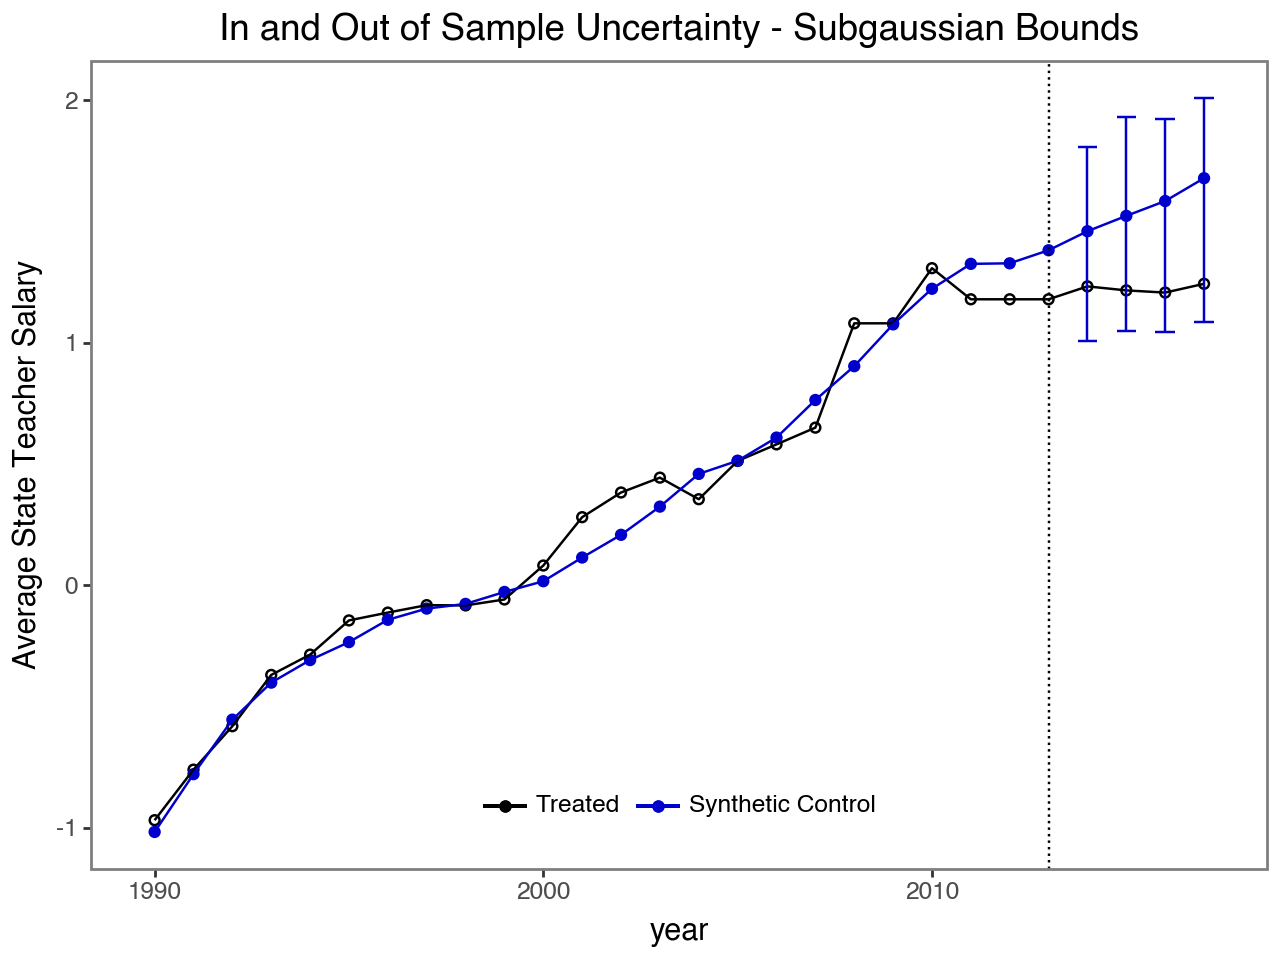

In [34]:
from scpi_pkg.scpi import scpi

w_constr = {'name': 'simplex', 'Q': 1}
u_missp = True
u_sigma = "HC1"
u_order = 1
u_lags = 0
e_method = "gaussian"
e_order = 1
e_lags = 0
e_alpha = 0.05
u_alpha = 0.05
sims = 200
cores = 1

random.seed(1)
result = scpi(scdf, sims=sims, w_constr=w_constr, u_order=u_order, u_lags=u_lags,
              e_order=e_order, e_lags=e_lags, e_method=e_method, u_missp=u_missp,
              u_sigma=u_sigma, cores=cores, e_alpha=e_alpha, u_alpha=u_alpha)
scplot(result, e_out=True, x_lab="year", y_lab="Average State Teacher Salary")

In [35]:
sc = np.concatenate([est_si.Y_pre_fit, est_si.Y_post_fit]).reshape(-1, 1).flatten()

sc_original = scaler.inverse_transform(
    np.concatenate([est_si.Y_pre_fit, est_si.Y_post_fit]).reshape(-1, 1)).flatten()

synth_results = pd.DataFrame({
    'year': list(est_si.period_pre) + list(est_si.period_post),
    'synthetic_control': sc_original, 
    'synthetic_control_scaled': sc})

df = pd.merge(df, synth_results, on = ['year'], how = 'left')

In [36]:
# Calculate treatment effects
df['te'] = df['salary'] - df['synthetic_control']

df_te_mi = df[df['st'] == 'MI']
df_te_mi = df_te_mi[df_te_mi['after_treatment'] == True]
df_te_mi = df_te_mi[['year', 'state', 'salary', 'synthetic_control', 'te']]
df_te_mi

,year,state,salary,synthetic_control,te
304,2014,Michigan,62166,64759.357784,-2593.357784
305,2015,Michigan,61978,65481.497288,-3503.497288
306,2016,Michigan,61875,66178.210357,-4303.210357
307,2017,Michigan,62287,67252.473112,-4965.473112


## Conclusion
### Weaknesses
Outcome - teacher salaries reflect a plethora of factors, including state funding, cost of living, teacher caliber

Strong assumption of parallel trends for diff in diff, although visually appears to hold intact

Don't have data to isolate effect of RTW laws on unionised teacher salaries vs non-unionised teacher salaries. 

Impact differences on high vs low teacher earners

### Further studies
Only public teacher salaries. Interesting to see how private teacher salaries are affected -relating back to the study of unions on both public and private salaries

## References

https://docs.legis.wisconsin.gov/2011/related/lcactmemo/act010.pdf
https://pbswisconsin.org/news-item/what-to-know-about-wisconsins-act-10-and-the-2024-court-battle-over-the-law/
https://www.wpr.org/news/wisconsins-act-10-is-back-in-court-heres-what-to-know-about-the-controversial-law
https://apnews.com/f6a9de298a0a4871b2b673eb3e393b79 
[1] https://www.epi.org/unequalpower/publications/private-sector-unions-corporate-legal-erosion/
[2] https://www.nlrb.gov/about-nlrb/who-we-are/our-history/1947-taft-hartley-substantive-provisions
[3] https://www.dol.gov/general/aboutdol/history/chapter6
[4] https://www.aaup.org/brief/janus-v-american-federation-state-county-and-municipal-employees-council-31-138-s-ct-2018
[5] https://www.epi.org/publication/janus-and-fair-share-fees-the-organizations-financing-the-attack-on-unions-ability-to-represent-workers/
[6] Tang, Aaron. “LIFE AFTER JANUS.” Columbia Law Review, vol. 119, no. 3, 2019, pp. 677–762. JSTOR, https://www.jstor.org/stable/26652185. Accessed 26 Nov. 2025.
Dataset: https://www.kaggle.com/datasets/charitysturner/public-school-teacher-salaries/data

Report supporting Act 10: https://will-law.org/wp-content/uploads/2024/04/Act-10-Final-Report.pdf

Lyon (2021) Heroes vs villains: https://doi.org/10.1016/j.econedurev.2021.102105

CSPP: “Please cite: 
Grossmann, Matt, Caleb Lucas, and Benjamin Yoel. "Introducing CongressData and Correlates of State Policy." Scientific Data 12, no. 1 (2025): 1185.
Grossmann, Matt, Marty P. Jordan, and Joshua McCrain. "The correlates of state policy and the structure of state panel data." State Politics & Policy Quarterly 21, no. 4 (2021): 430-450.

Teacher salary dataset: https://ncses.nsf.gov/indicators/states/indicator/public-school-teacher-salaries/

“Recommended Citation: National Science Board. “Public School Teacher Salaries.” Science and Engineering Indicators: State Indicators. Alexandria, VA: National Science Foundation. https://ncses.nsf.gov/indicators/states/indicator/public-school-teacher-salaries. Accessed on [date of user access].”

